In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np
import pandas as pd
import os
import cv2

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [4]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                          

In [5]:
len(model.layers)

22

In [6]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/cnn_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [7]:
%time

optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


In [14]:
betw = 'Strawberry'
df = pd.read_csv('/content/drive/MyDrive/DATASET/Pixel_File_'+betw+'.csv')

In [15]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,159,130,133,165,136,139,145,116,119,...,197,176,175,201,179,174,192,170,165,0
2,2,193,186,191,190,183,188,197,190,195,...,173,162,174,171,161,172,158,148,160,0
3,3,127,100,103,130,105,107,132,106,109,...,168,133,130,170,135,132,171,136,134,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,4494,172,158,164,175,161,167,171,157,162,...,186,174,180,198,187,192,154,142,148,1
4495,4495,144,136,143,143,135,142,143,135,142,...,179,172,177,190,178,184,175,164,170,1
4496,4496,181,168,176,190,177,185,194,181,189,...,166,153,161,136,124,130,195,183,189,1
4497,4497,148,140,151,152,144,155,151,143,154,...,190,177,185,193,185,192,186,178,185,1


In [16]:
df = df.sample(frac = 1)
df = df.drop(columns = 'Unnamed: 0').reset_index()
df = df.drop(columns = 'index')

In [17]:
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,183,175,182,185,177,184,200,192,199,196,...,142,129,137,119,106,113,143,130,138,0
1,183,181,193,184,182,194,185,184,195,186,...,3,39,61,21,49,69,7,35,49,1
2,207,208,227,220,222,240,193,195,213,212,...,210,222,230,213,215,226,218,219,231,1
3,124,111,119,150,137,145,131,123,130,148,...,182,170,176,187,175,181,181,169,175,1
4,185,164,170,170,150,155,162,142,147,192,...,140,119,127,114,93,101,154,133,141,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,175,152,156,157,134,139,129,108,111,143,...,157,122,119,157,119,117,156,118,116,0
4495,200,186,192,212,198,204,208,194,200,203,...,118,102,109,112,96,103,126,110,117,1
4496,135,127,134,180,172,179,140,132,139,172,...,176,164,172,172,157,165,172,157,165,1
4497,142,129,136,148,135,143,146,131,139,158,...,182,170,177,195,181,186,184,170,176,0


In [18]:
print(len(df))
y = df.label
x = df.drop(columns = ['label'])

4499


In [19]:
print(y)
print(x)

0       0
1       1
2       1
3       1
4       0
       ..
4494    0
4495    1
4496    1
4497    0
4498    0
Name: label, Length: 4499, dtype: int64
        0    1    2    3    4    5    6    7    8    9  ...  2342  2343  2344  \
0     183  175  182  185  177  184  200  192  199  196  ...   143   142   129   
1     183  181  193  184  182  194  185  184  195  186  ...   111     3    39   
2     207  208  227  220  222  240  193  195  213  212  ...   216   210   222   
3     124  111  119  150  137  145  131  123  130  148  ...   181   182   170   
4     185  164  170  170  150  155  162  142  147  192  ...   100   140   119   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
4494  175  152  156  157  134  139  129  108  111  143  ...   125   157   122   
4495  200  186  192  212  198  204  208  194  200  203  ...   125   118   102   
4496  135  127  134  180  172  179  140  132  139  172  ...   154   176   164   
4497  142  129  136  148  135  143  146 

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [21]:
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

In [24]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 30,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/30
42/43 [============================>.] - ETA: 0s - loss: 0.8798 - accuracy: 0.8199

43/43 [==============================] - 4s 99ms/step - loss: 0.8796 - accuracy: 0.8190 - val_loss: 0.8570 - val_accuracy: 0.8444
Epoch 2/30
43/43 [==============================] - ETA: 0s - loss: 0.8679 - accuracy: 0.8149

43/43 [==============================] - 6s 135ms/step - loss: 0.8679 - accuracy: 0.8149 - val_loss: 0.8312 - val_accuracy: 0.8510
Epoch 3/30
42/43 [============================>.] - ETA: 0s - loss: 0.8389 - accuracy: 0.8408

43/43 [==============================] - 5s 117ms/step - loss: 0.8382 - accuracy: 0.8407 - val_loss: 0.8070 - val_accuracy: 0.8675
Epoch 4/30
43/43 [==============================] - ETA: 0s - loss: 0.7872 - accuracy: 0.8558

43/43 [==============================] - 5s 128ms/step - loss: 0.7872 - accuracy: 0.8558 - val_loss: 0.7788 - val_accuracy: 0.8874
Epoch 5/30
43/43 [==============================] - ETA: 0s - loss: 0.7790 - accuracy: 0.8599

43/43 [==============================] - 11s 253ms/step - loss: 0.7790 - accuracy: 0.8599 - val_loss: 0.7496 - val_accuracy: 0.8940
Epoch 6/30
43/43 [==============================] - ETA: 0s - loss: 0.7556 - accuracy: 0.8617

43/43 [==============================] - 9s 210ms/step - loss: 0.7556 - accuracy: 0.8617 - val_loss: 0.7328 - val_accuracy: 0.8940
Epoch 7/30
43/43 [==============================] - ETA: 0s - loss: 0.7339 - accuracy: 0.8802

43/43 [==============================] - 8s 191ms/step - loss: 0.7339 - accuracy: 0.8802 - val_loss: 0.7011 - val_accuracy: 0.8974
Epoch 8/30
43/43 [==============================] - ETA: 0s - loss: 0.7140 - accuracy: 0.8842

43/43 [==============================] - 7s 162ms/step - loss: 0.7140 - accuracy: 0.8842 - val_loss: 0.6805 - val_accuracy: 0.9040
Epoch 9/30
42/43 [============================>.] - ETA: 0s - loss: 0.7122 - accuracy: 0.8884

43/43 [==============================] - 4s 99ms/step - loss: 0.7114 - accuracy: 0.8883 - val_loss: 0.6545 - val_accuracy: 0.9040
Epoch 10/30
42/43 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.8839

43/43 [==============================] - 4s 98ms/step - loss: 0.6931 - accuracy: 0.8835 - val_loss: 0.6263 - val_accuracy: 0.9172
Epoch 11/30
43/43 [==============================] - ETA: 0s - loss: 0.6576 - accuracy: 0.9038

43/43 [==============================] - 6s 133ms/step - loss: 0.6576 - accuracy: 0.9038 - val_loss: 0.6058 - val_accuracy: 0.9238
Epoch 12/30
43/43 [==============================] - ETA: 0s - loss: 0.6334 - accuracy: 0.9137

43/43 [==============================] - 5s 105ms/step - loss: 0.6334 - accuracy: 0.9137 - val_loss: 0.5903 - val_accuracy: 0.9305
Epoch 13/30
43/43 [==============================] - ETA: 0s - loss: 0.6310 - accuracy: 0.9063

43/43 [==============================] - 5s 128ms/step - loss: 0.6310 - accuracy: 0.9063 - val_loss: 0.5766 - val_accuracy: 0.9338
Epoch 14/30
42/43 [============================>.] - ETA: 0s - loss: 0.6048 - accuracy: 0.9193

43/43 [==============================] - 10s 235ms/step - loss: 0.6114 - accuracy: 0.9178 - val_loss: 0.5551 - val_accuracy: 0.9371
Epoch 15/30
43/43 [==============================] - ETA: 0s - loss: 0.6046 - accuracy: 0.9122

43/43 [==============================] - 7s 162ms/step - loss: 0.6046 - accuracy: 0.9122 - val_loss: 0.5378 - val_accuracy: 0.9371
Epoch 16/30
42/43 [============================>.] - ETA: 0s - loss: 0.5770 - accuracy: 0.9204

43/43 [==============================] - 10s 229ms/step - loss: 0.5759 - accuracy: 0.9207 - val_loss: 0.5291 - val_accuracy: 0.9371
Epoch 17/30
43/43 [==============================] - ETA: 0s - loss: 0.5692 - accuracy: 0.9259

43/43 [==============================] - 10s 243ms/step - loss: 0.5692 - accuracy: 0.9259 - val_loss: 0.5137 - val_accuracy: 0.9371
Epoch 18/30
43/43 [==============================] - ETA: 0s - loss: 0.5444 - accuracy: 0.9358

43/43 [==============================] - 7s 153ms/step - loss: 0.5444 - accuracy: 0.9358 - val_loss: 0.4988 - val_accuracy: 0.9371
Epoch 19/30
43/43 [==============================] - ETA: 0s - loss: 0.5330 - accuracy: 0.9355

43/43 [==============================] - 6s 139ms/step - loss: 0.5330 - accuracy: 0.9355 - val_loss: 0.4791 - val_accuracy: 0.9470
Epoch 20/30
42/43 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.9289

43/43 [==============================] - 5s 108ms/step - loss: 0.5406 - accuracy: 0.9292 - val_loss: 0.4725 - val_accuracy: 0.9470
Epoch 21/30
42/43 [============================>.] - ETA: 0s - loss: 0.5012 - accuracy: 0.9401

43/43 [==============================] - 4s 99ms/step - loss: 0.4996 - accuracy: 0.9406 - val_loss: 0.4605 - val_accuracy: 0.9470
Epoch 22/30
43/43 [==============================] - ETA: 0s - loss: 0.4865 - accuracy: 0.9421

43/43 [==============================] - 5s 124ms/step - loss: 0.4865 - accuracy: 0.9421 - val_loss: 0.4486 - val_accuracy: 0.9470
Epoch 23/30
42/43 [============================>.] - ETA: 0s - loss: 0.4801 - accuracy: 0.9431

43/43 [==============================] - 5s 113ms/step - loss: 0.4808 - accuracy: 0.9428 - val_loss: 0.4390 - val_accuracy: 0.9503
Epoch 24/30
43/43 [==============================] - ETA: 0s - loss: 0.4918 - accuracy: 0.9395

43/43 [==============================] - 4s 98ms/step - loss: 0.4918 - accuracy: 0.9395 - val_loss: 0.4301 - val_accuracy: 0.9503
Epoch 25/30
43/43 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.9502

43/43 [==============================] - 5s 119ms/step - loss: 0.4676 - accuracy: 0.9502 - val_loss: 0.4188 - val_accuracy: 0.9503
Epoch 26/30
42/43 [============================>.] - ETA: 0s - loss: 0.4381 - accuracy: 0.9546

43/43 [==============================] - 5s 118ms/step - loss: 0.4396 - accuracy: 0.9543 - val_loss: 0.4138 - val_accuracy: 0.9503
Epoch 27/30
42/43 [============================>.] - ETA: 0s - loss: 0.4422 - accuracy: 0.9494

43/43 [==============================] - 4s 98ms/step - loss: 0.4430 - accuracy: 0.9491 - val_loss: 0.4071 - val_accuracy: 0.9503
Epoch 28/30
43/43 [==============================] - ETA: 0s - loss: 0.4200 - accuracy: 0.9594

43/43 [==============================] - 5s 112ms/step - loss: 0.4200 - accuracy: 0.9594 - val_loss: 0.3964 - val_accuracy: 0.9503
Epoch 29/30
42/43 [============================>.] - ETA: 0s - loss: 0.4236 - accuracy: 0.9546

43/43 [==============================] - 5s 124ms/step - loss: 0.4251 - accuracy: 0.9546 - val_loss: 0.3801 - val_accuracy: 0.9536
Epoch 30/30
42/43 [============================>.] - ETA: 0s - loss: 0.3975 - accuracy: 0.9598

43/43 [==============================] - 4s 98ms/step - loss: 0.3972 - accuracy: 0.9598 - val_loss: 0.3727 - val_accuracy: 0.9536
Duration: 0:03:21.998356


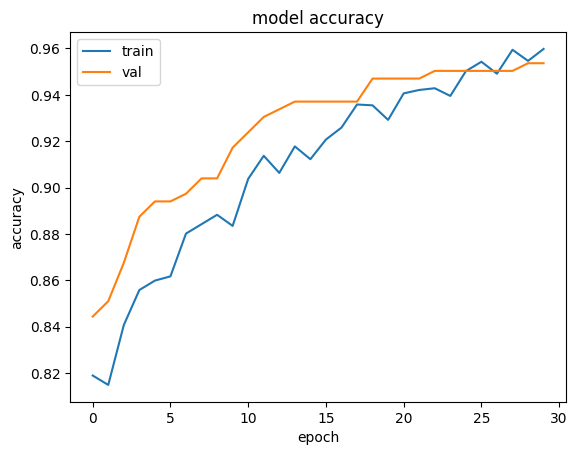

val 0.9536423683166504
min val 0.8443708419799805
acc 0.9598082304000854
mean val 0.9243929425875346


In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])


plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

In [26]:
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

93/93 [==============================] - 1s 13ms/step


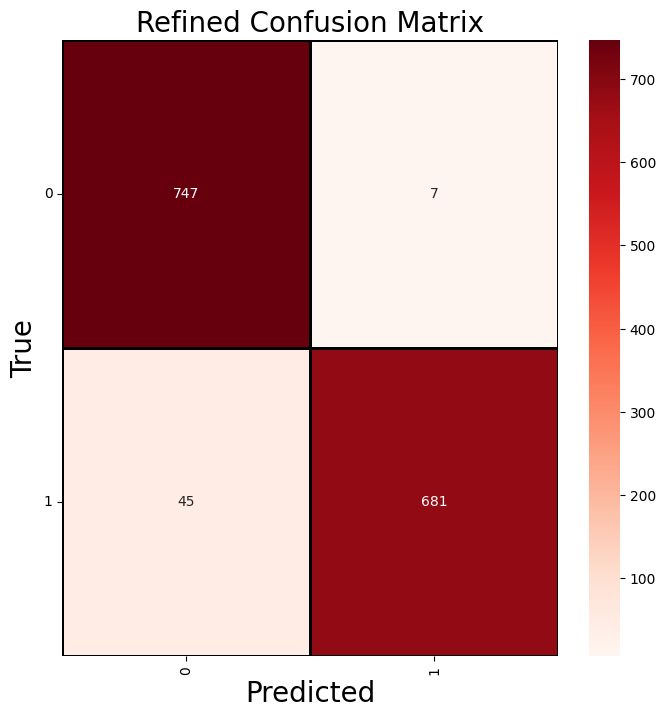

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
Pred = model.predict(x_test, batch_size=16)
Pred_Label = np.argmax(Pred, axis=1)
ConfusionM = confusion_matrix(list(y_test), Pred_Label, labels=[0,1])
cm = ConfusionM
targetnames = [0,1]
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

ROC AUC Score=0.961


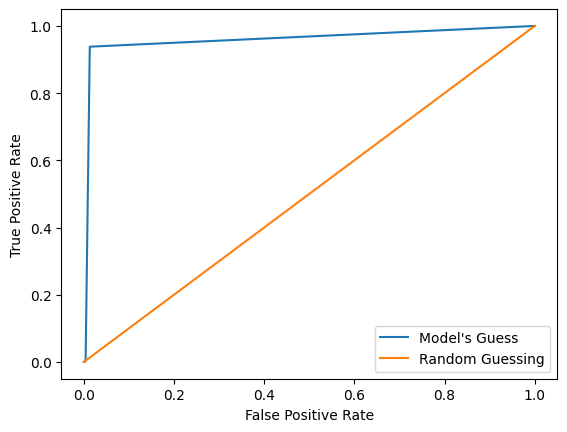

In [47]:
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, Pred_Label)
# summarize scores
print('ROC AUC Score=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, Pred_Label)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, label="Model's Guess")
pyplot.plot(ns_fpr, ns_tpr, label='Random Guessing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [36]:
from sklearn.metrics import classification_report
targetnames = [0,1]
tar = []
for i in targetnames:
  tar.append(str(i))
class_report = classification_report(list(y_test), Pred_Label, labels=[0, 1], target_names=tar)

In [37]:
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       757
           1       0.99      0.94      0.96       728

   micro avg       0.96      0.96      0.96      1485
   macro avg       0.97      0.96      0.96      1485
weighted avg       0.97      0.96      0.96      1485



In [38]:
model.save_weights('/content/drive/MyDrive/MODELS/'+betw+'/cnn_model_weights.h5')

In [39]:
model.save('/content/drive/MyDrive/MODELS/'+betw+'/cnn_model_.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
